
# RNA-seq Gene Expression Analysis — Cancer Dataset  
**Author:** Sahil Bilal  
**Affiliation:** B.Sc. Medical, Cluster University Srinagar  
**Project:** RNA-seq data exploration and visualization for cancer transcriptomics  


## 1. Import Libraries and Load Dataset

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

try:
    df = pd.read_csv("data.csv")
    labels = pd.read_csv("labels.csv")

    if 'Unnamed: 0' in df.columns:
        df = df.set_index('Unnamed: 0')
    if 'Unnamed: 0' in labels.columns:
        labels = labels.set_index('Unnamed: 0')

    print("✅ Data successfully loaded!")
    print("Data shape:", df.shape)
    print("Labels shape:", labels.shape)
    display(df.head())

except FileNotFoundError:
    print("❌ Error: data.csv or labels.csv not found. Please place them in the same folder as this notebook.")


✅ Data successfully loaded!
Data shape: (801, 20531)
Labels shape: (801, 1)


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


## 2. Data Summary and Quality Check

In [3]:

if 'df' in locals():
    missing = df.isna().sum().sum()
    print(f"Total missing values in dataset: {missing}")
    desc = df.describe().T[['mean', 'std', 'min', 'max']].head(10)
    print("Sample gene-level summary (first 10 genes):")
    display(desc)
else:
    print("Dataset not loaded.")


Total missing values in dataset: 0
Sample gene-level summary (first 10 genes):


,mean,std,min,max
gene_0,0.026642,0.136850,0.000000,1.482332
gene_1,3.010909,1.200828,0.000000,6.237034
gene_2,3.095350,1.065601,0.000000,6.063484
gene_3,6.722305,0.638819,5.009284,10.129528
gene_4,9.813612,0.506537,8.435999,11.355621
gene_5,0.000000,0.000000,0.000000,0.000000
gene_6,7.405509,1.108237,3.930747,10.718190
gene_7,0.499882,0.508799,0.000000,2.779008
gene_8,0.016744,0.133635,0.000000,1.785592
gene_9,0.013428,0.204722,0.000000,4.067604


## 3. Distribution of Expression Values

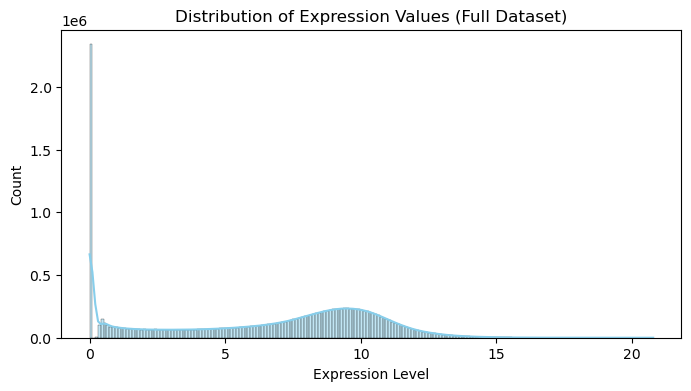

In [9]:

if 'df' in locals():
    plt.figure(figsize=(8,4))
    sns.histplot(df.values.flatten(), bins=200, kde=True, color='skyblue')
    plt.title("Distribution of Expression Values (Full Dataset)")
    plt.xlabel("Expression Level")
    plt.ylabel("Count")
    plt.show()
else:
    print("Dataset not loaded.")


## 4. Top 10 Highly Expressed Genes

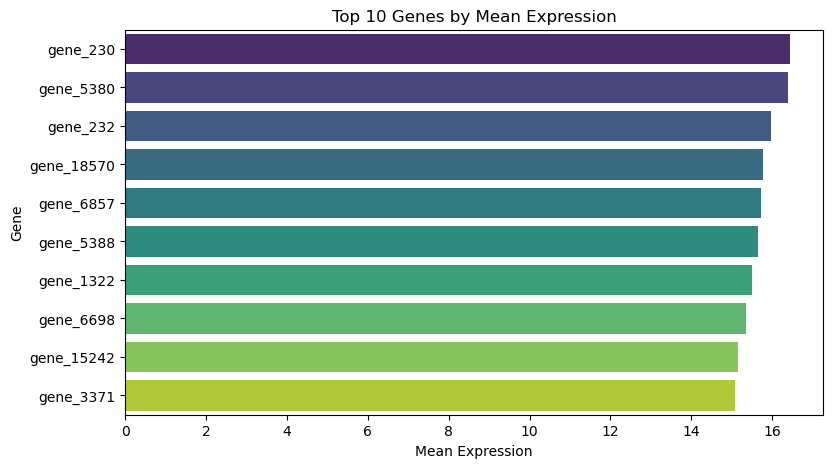

In [12]:

if 'df' in locals():
    top10 = df.mean(axis=0).sort_values(ascending=False).head(10)
    plt.figure(figsize=(9,5))
 
    sns.barplot(x=top10.values, y=top10.index, hue=top10.index, palette="viridis", legend=False) 
 
    plt.xlabel("Mean Expression")
    plt.ylabel("Gene")
    plt.title("Top 10 Genes by Mean Expression")
    plt.show()
else:
    print("Dataset not loaded.")


## 5. PCA on Samples (All Genes)

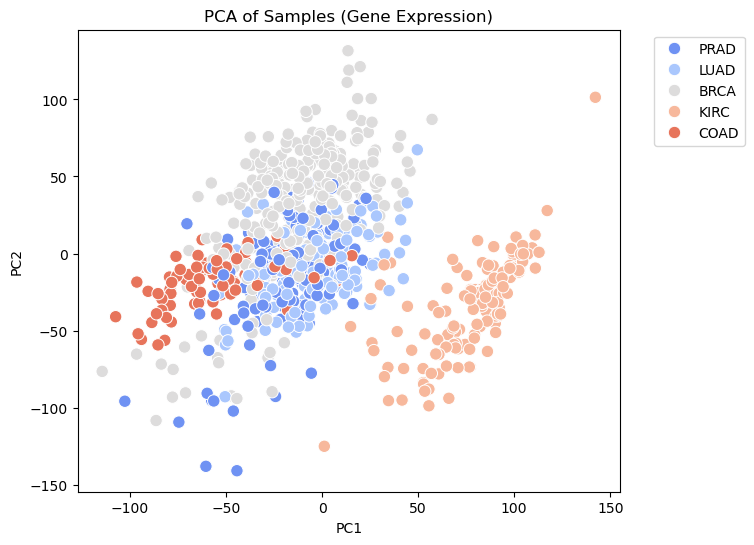

In [6]:

if 'df' in locals():
    X = df.values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)

    pca_df = pd.DataFrame(pcs, columns=['PC1', 'PC2'], index=df.index)
    if 'Class' in labels.columns:
        pca_df = pca_df.join(labels['Class'], how='left')

    plt.figure(figsize=(7,6))
    sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, s=80, palette='coolwarm')
    plt.title("PCA of Samples (Gene Expression)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
else:
    print("Dataset not loaded.")


## 6. Sample Correlation Heatmap

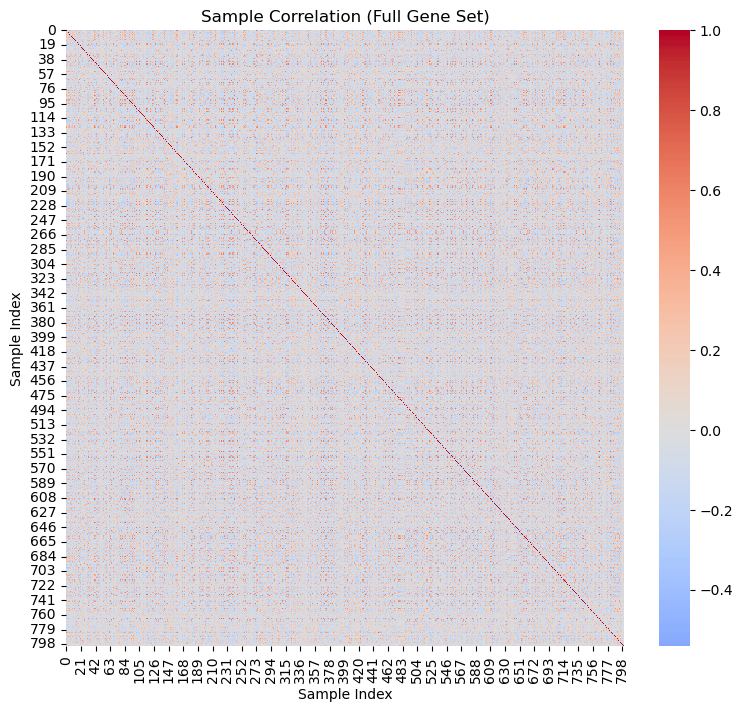

In [7]:

if 'df' in locals():
    corr = np.corrcoef(StandardScaler().fit_transform(df.values))
    plt.figure(figsize=(9,8))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title("Sample Correlation (Full Gene Set)")
    plt.xlabel("Sample Index")
    plt.ylabel("Sample Index")
    plt.show()
else:
    print("Dataset not loaded.")


## 7. Save Processed Outputs

In [8]:

if 'pca_df' in locals():
    pca_df.to_csv("full_pca_coordinates.csv")
    labels[['Class']].to_csv("full_labels_for_pca.csv")
    print("✅ Saved PCA coordinates and class labels.")
else:
    print("PCA not run yet. Please execute previous cells first.")


✅ Saved PCA coordinates and class labels.
